<a href="https://colab.research.google.com/github/MonikaLamba/DEEPLEARNING/blob/master/GSE7390_PARTIAL_DEPENDENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:


data = pd.read_csv('/content/GSE7390_PI.csv')
y = (data['Grade'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

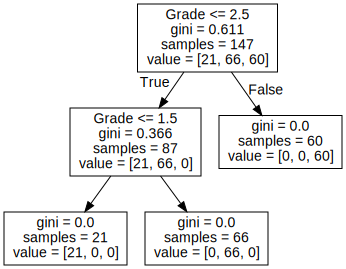

In [3]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [5]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 190 kB/s 
     |████████████████████████████████| 13.1 MB 31.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=3ccbe41afaa227ab0130ab2588eee372ef430da6b3c516d1c46b25fd802fe38c
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


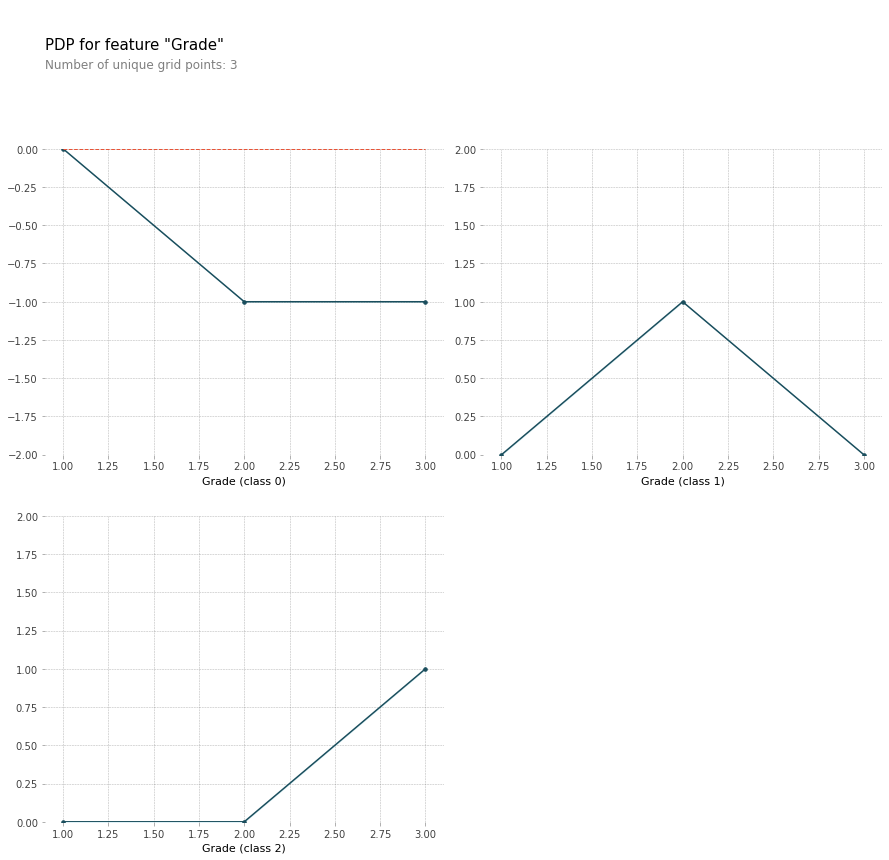

In [8]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Grade')

# plot it
pdp.pdp_plot(pdp_goals, 'Grade')
plt.show()

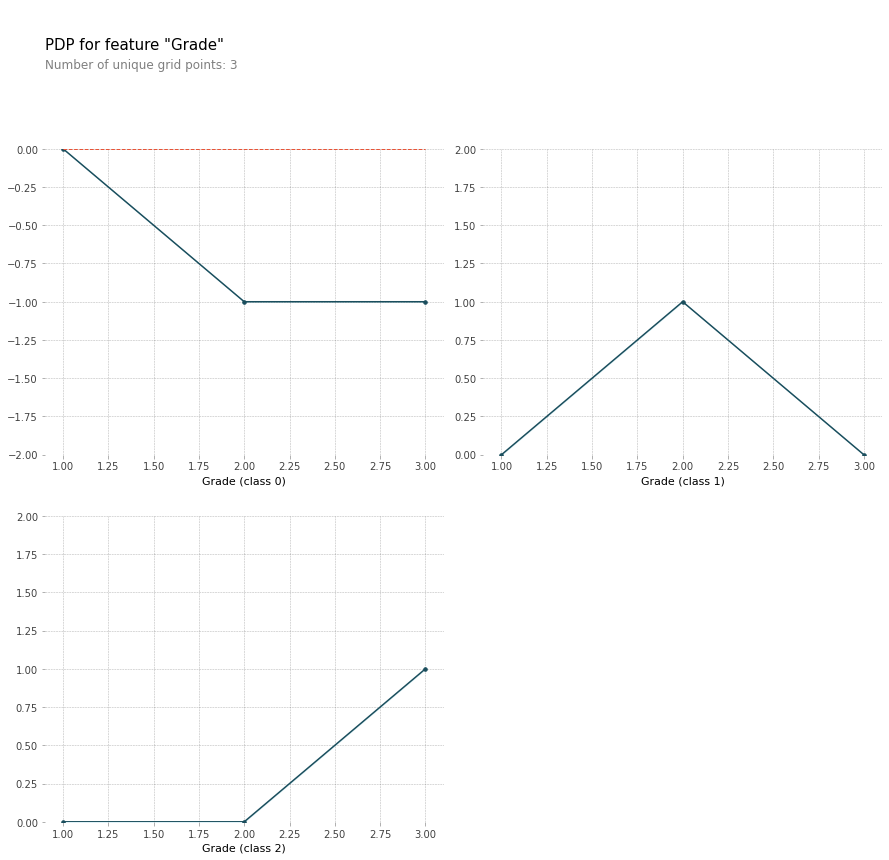

In [9]:
feature_to_plot = 'Grade'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [10]:
data

,CCNB2,FOSB,PLAGL2,E2F3,TPD52L1,TGFBR3,MELK,SPTBN2,PSMC3IP,NMU,GINS1,MAB21L1 /// MIR548F5,BTF3,C6,MZT2A /// MZT2B /// PHGDH,MYL7,Grade
0,0.654382,0.295321,0.538909,0.597706,0.748824,0.553930,0.583414,0.491492,0.528650,0.346522,0.633540,0.511415,0.865215,0.398777,0.754724,0.293861,3
1,0.668736,0.229366,0.481109,0.531367,0.791523,0.613288,0.606787,0.253269,0.540854,0.365202,0.677721,0.339474,0.905351,0.432905,0.784623,0.262287,3
2,0.646722,0.292071,0.478049,0.656209,0.654907,0.662126,0.600362,0.406585,0.479151,0.491059,0.564244,0.452460,0.843631,0.344383,0.754034,0.244130,3
3,0.650196,0.255681,0.513419,0.541179,0.699407,0.537574,0.582398,0.419107,0.516015,0.227291,0.662114,0.290897,0.834300,0.303492,0.761200,0.218276,3
4,0.612916,0.315851,0.549996,0.539186,0.648010,0.531873,0.615877,0.471110,0.573092,0.299725,0.606361,0.334080,0.879163,0.341800,0.810353,0.306926,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.512356,0.474270,0.503189,0.551019,0.675361,0.649664,0.528356,0.273118,0.514215,0.272388,0.572280,0.496512,0.859229,0.463679,0.749055,0.289433,3
192,0.558574,0.491500,0.445042,0.505916,0.716182,0.648506,0.571368,0.224181,0.562947,0.434480,0.591205,0.545338,0.877078,0.467359,0.774577,0.225268,3
193,0.701552,0.324714,0.508178,0.620350,0.779485,0.574286,0.696505,0.556199,0.580141,0.656489,0.710224,0.361673,0.809844,0.428169,0.770752,0.309362,1
194,0.736956,0.277995,0.476713,0.672419,0.759039,0.626353,0.772166,0.386231,0.534366,0.568981,0.629809,0.375874,0.836498,0.452066,0.784211,0.226790,2


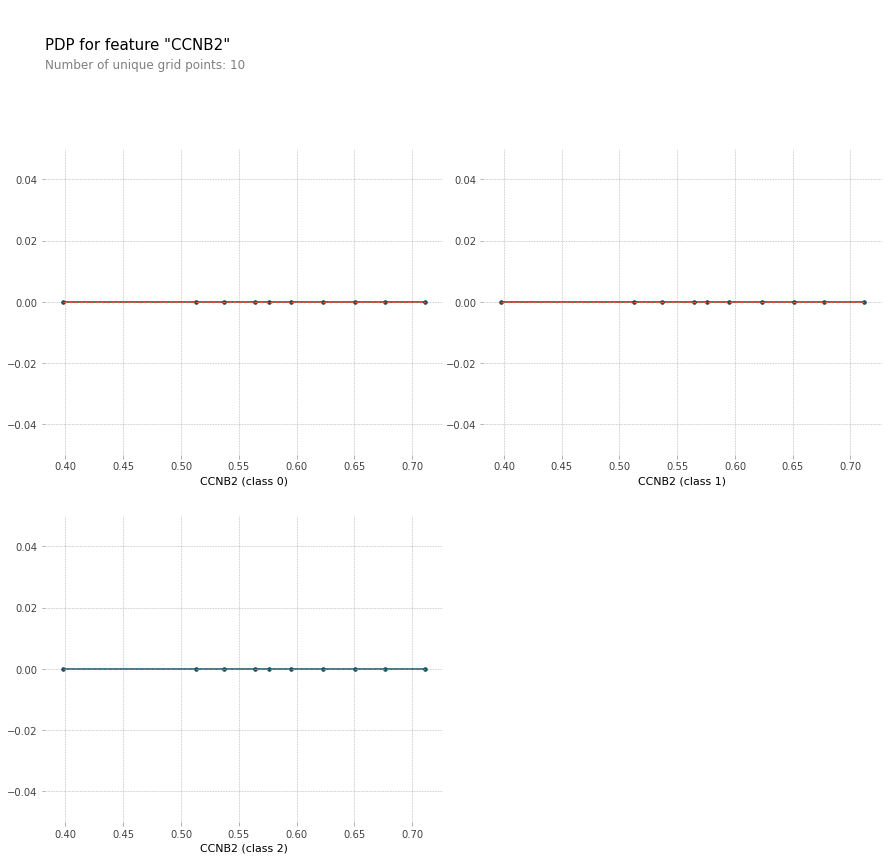

In [11]:
feature_to_plot = 'CCNB2'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

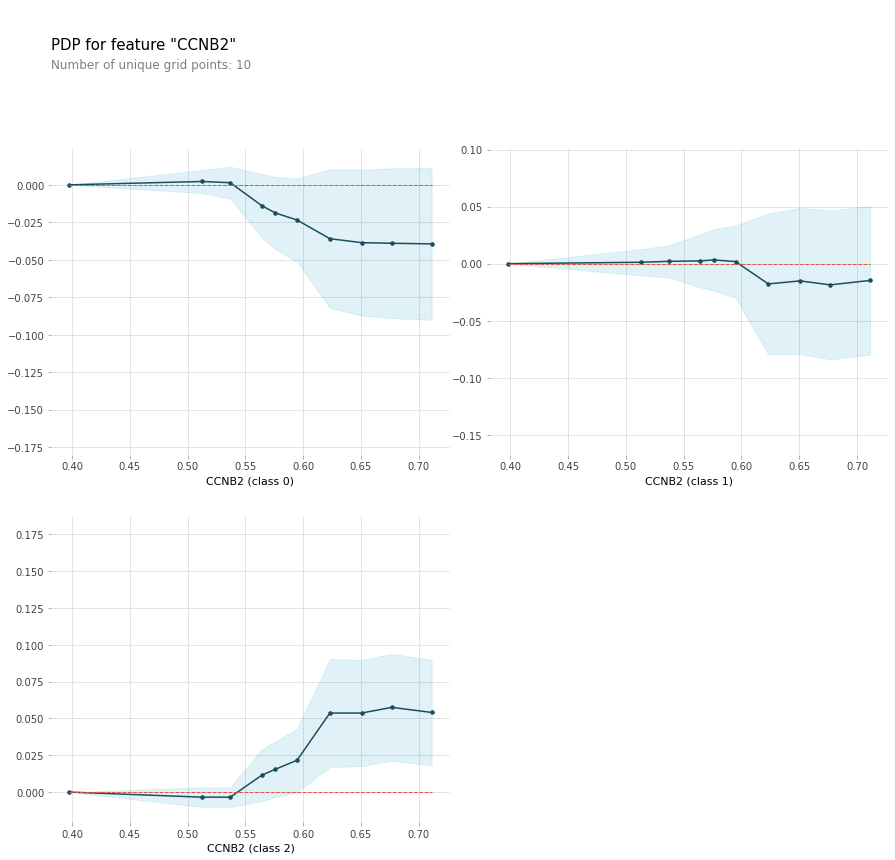

In [12]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

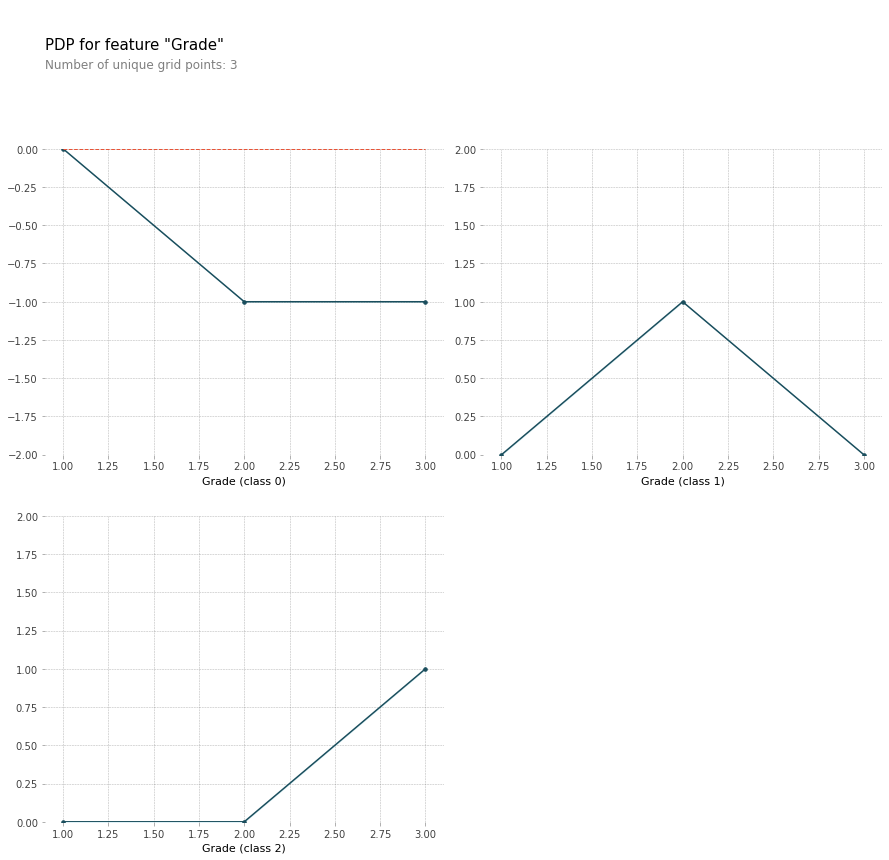

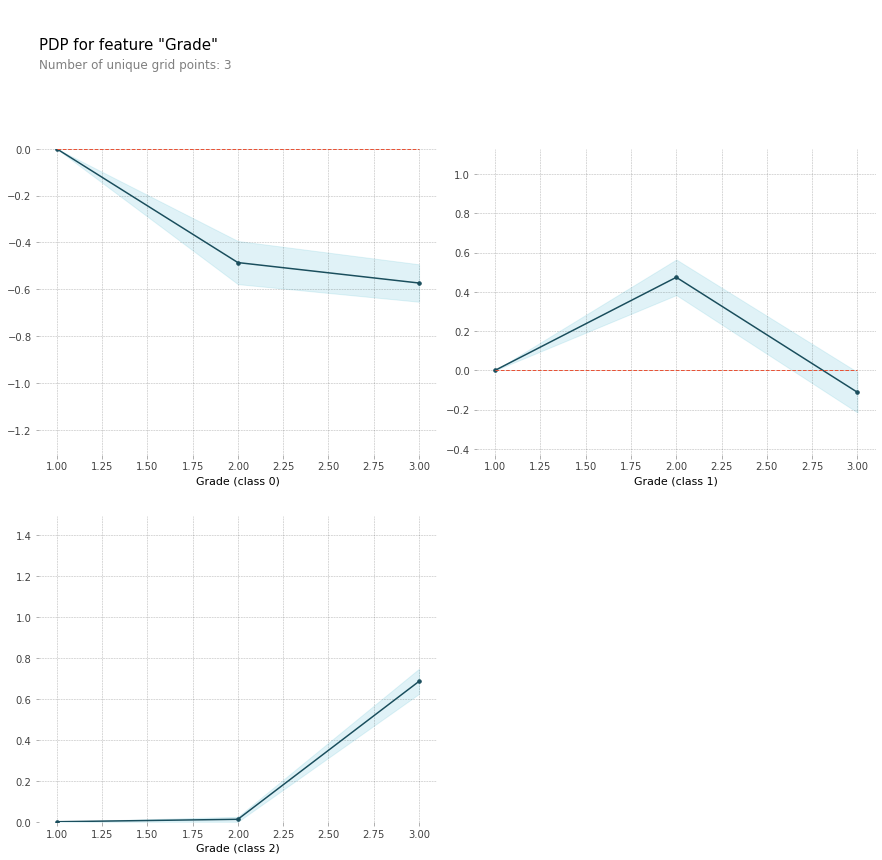

In [13]:
feature_to_plot = 'Grade'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()


# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

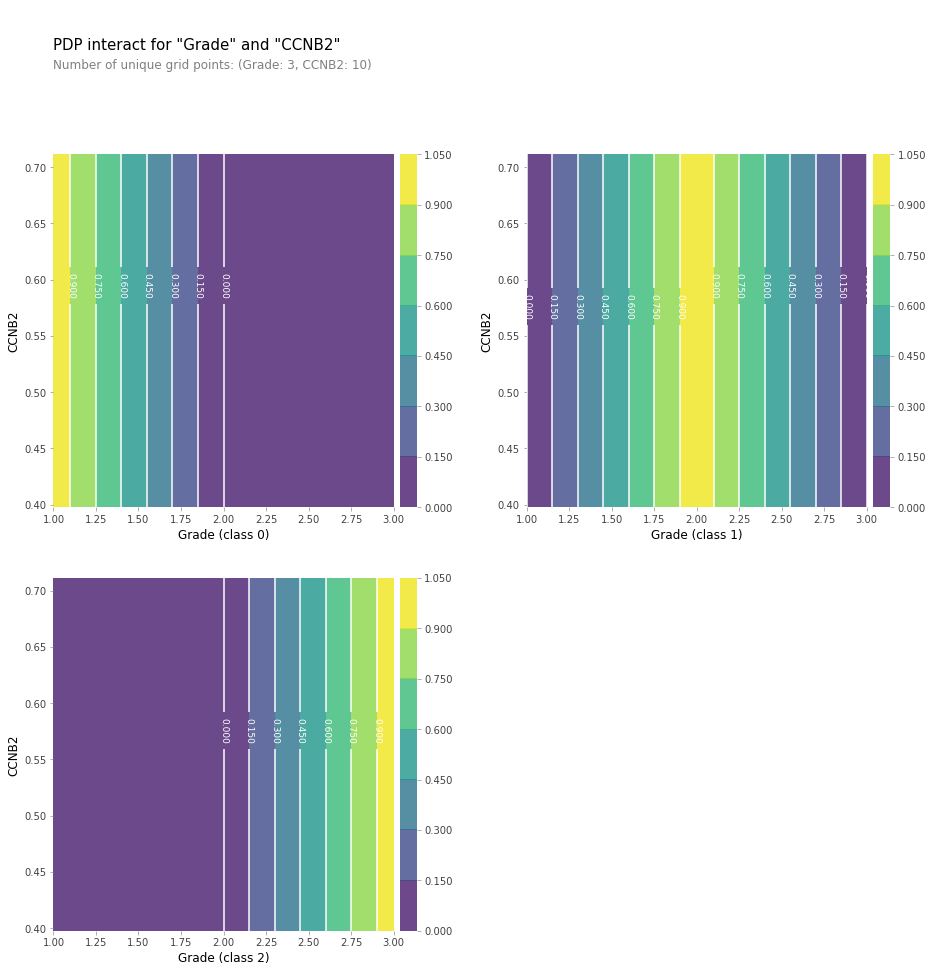

In [14]:
features_to_plot = ['Grade', 'CCNB2']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/GSE7390_PI.csv')
y = (data['Grade'])  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [16]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

array([[0.02, 0.1 , 0.88]])

In [18]:
!pip install shap

     |████████████████████████████████| 564 kB 3.1 MB/s 


In [19]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [25]:
shap.initjs()

In [26]:
# use Kernel SHAP to explain test set predictions
shap.initjs()
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

Using 147 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


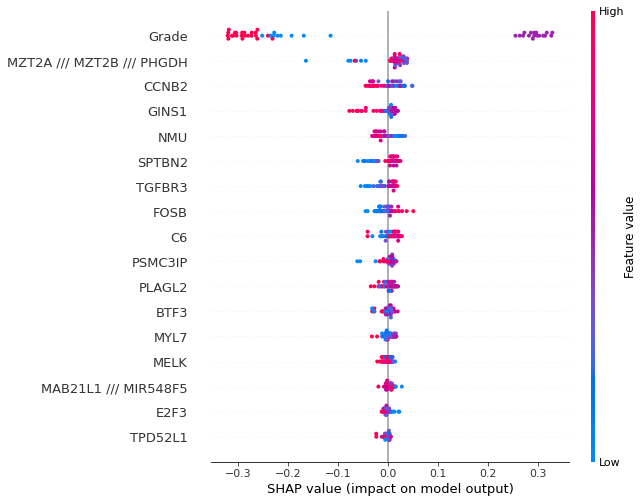

In [27]:
# SHAP VALUES FOR ADVANCED USE
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

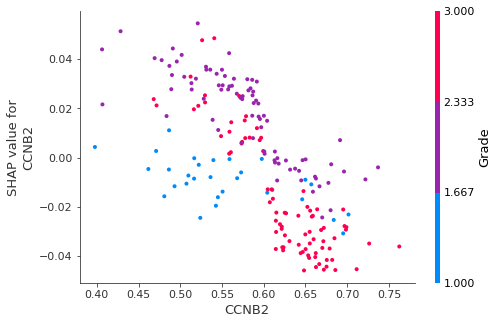

In [28]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('CCNB2', shap_values[1], X, interaction_index="Grade")